# Computation of annotation enrichment in a genetic set 

This code excerpt shows how to use the annotation enrichment computation function in a genetic set.
The funciton return a dataframe of binom and hypergeometric p-value (<= 0.05) and for each p-value a fdr correction with alpha = 0.05.   

In the second part of the code we will compare the results obtained with the Great webserver and between the binomial and hypergeometric probability

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import greatpy as great

## I Compute the p-values

In [4]:
enrichment_fdr = great.tl.enrichment(
    test="../data/human/test_genomic_region.bed",
    regdom_file="../data/human/regulatory_domain.bed",
    chr_size_file="../data/human/chr_size.bed",
    annotation="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("fdr",0.05),
    sort_by="binom_fdr_correction",
    )

c:\Users\Tom\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:339: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha
c:\Users\Tom\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:347: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


In [5]:
enrichment_fdr

,go_term,binom_p_value,hypergeom_p_value,binom_fdr_correction,hypergeom_fdr_correction
GO:0045887,positive regulation of synaptic growth at neur...,5.17744e-13,2.92750e-03,3.07540e-10,9.64682e-02
GO:0016561,"protein import into peroxisome matrix, translo...",6.31131e-10,5.84656e-03,9.37230e-08,9.64682e-02
GO:0044721,"protein import into peroxisome matrix, substra...",4.83812e-10,2.92750e-03,9.37230e-08,9.64682e-02
GO:0036250,peroxisome transport along microtubule,4.83812e-10,2.92750e-03,9.37230e-08,9.64682e-02
GO:0047485,protein N-terminus binding,1.29450e-09,5.03770e-03,1.53786e-07,9.64682e-02
...,...,...,...,...,...
GO:0072197,ureter morphogenesis,1.97164e-02,5.84656e-03,4.43620e-02,9.64682e-02
GO:0061138,morphogenesis of a branching epithelium,2.06973e-02,8.75719e-03,4.63932e-02,1.00034e-01
GO:0045063,T-helper 1 cell differentiation,2.11867e-02,1.45533e-02,4.71344e-02,1.06496e-01
GO:0006888,ER to Golgi vesicle-mediated transport,2.11222e-02,5.36764e-01,4.71344e-02,6.10801e-01


In [6]:
enrichment_bonferroni = great.tl.enrichment(
    test="../data/human/test_genomic_region.bed",
    regdom_file="../data/human/regulatory_domain.bed",
    chr_size_file="../data/human/chr_size.bed",
    annotation="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("bonferroni",0.05),
    )

c:\Users\Tom\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:150: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
c:\Users\Tom\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:257: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


In [7]:
enrichment_bonferroni

,go_term,binom_p_value,hypergeom_p_value,binom_bonferroni_correction,hypergeom_bonferroni_correction
GO:0002162,dystroglycan binding,1.29786e-05,4.02252e-02,7.70928e-03,1
GO:0007213,G protein-coupled acetylcholine receptor signa...,4.28794e-05,4.86352e-02,2.54703e-02,1
GO:0033691,sialic acid binding,1.83861e-06,3.45779e-02,1.09214e-03,1
GO:0035374,chondroitin sulfate binding,1.06551e-06,2.60455e-02,6.32912e-04,1
GO:0043113,receptor clustering,6.53249e-05,7.61475e-02,3.88030e-02,1
...,...,...,...,...,...
GO:0008479,queuine tRNA-ribosyltransferase activity,1.75630e-05,1.16594e-02,1.04324e-02,1
GO:0101030,tRNA-guanine transglycosylation,2.90290e-05,1.16594e-02,1.72432e-02,1
GO:0044323,retinoic acid-responsive element binding,4.63051e-07,1.16594e-02,2.75052e-04,1
GO:0048387,negative regulation of retinoic acid receptor ...,8.90815e-06,2.60455e-02,5.29144e-03,1


## II Compare to GREAT webserver  

## III Compare both results

### III.1 Without correction

#### III.1.a Without log scale

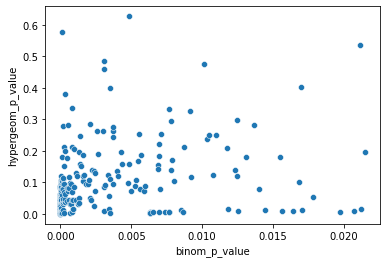

In [8]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_p_value",
    "hypergeom_p_value",
    minus_log10=False)

#### III.1.b With log scale

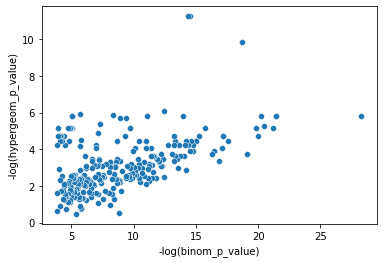

In [9]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_p_value",
    "hypergeom_p_value",
    minus_log10=True)

Resembling the images of the articule published by the Berjano lab: https://www.nature.com/articles/nbt.1630/figures/2

### III.2 With fdr correction

#### III.2.a without log scale

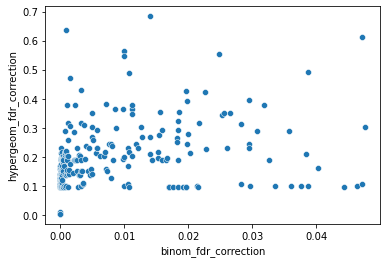

In [10]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_fdr_correction",
    "hypergeom_fdr_correction",
    minus_log10=False)


#### III.2.b with log scale

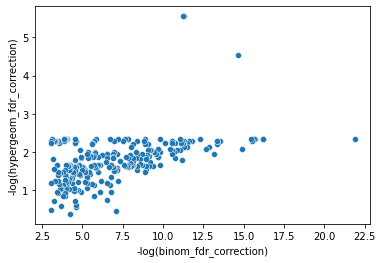

In [11]:
great.pl.scatterplot(
    enrichment_fdr,
    "binom_fdr_correction",
    "hypergeom_fdr_correction",
    minus_log10=True)

### III.3 With bonferroni correction

#### III.3.a without log scale

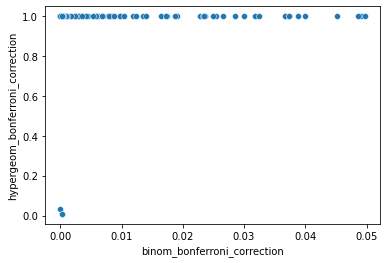

In [12]:
great.pl.scatterplot(
    enrichment_bonferroni,
    "binom_bonferroni_correction",
    "hypergeom_bonferroni_correction",
    minus_log10=False)

#### III.3.b with log scale

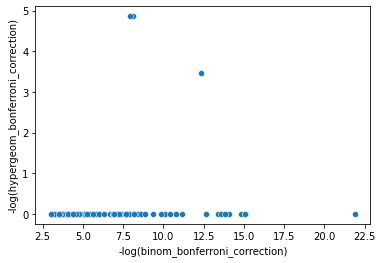

In [13]:
great.pl.scatterplot(
    enrichment_bonferroni,
    "binom_bonferroni_correction",
    "hypergeom_bonferroni_correction",
    minus_log10=True)

We can see that the two corrections return very different values